<a href="https://colab.research.google.com/github/pkoneill/VisualizingBrainWaves/blob/main/Visualizing_Brain_Waves_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
Earlier in the workshop we learned how Hans Berger was able to at last record two main types of brain waves using an EEG: Alpha waves and Beta waves. These waves are defined by their **frequency** of oscillation (how many peaks of the wave happen per second or Hertz(Hz)). Modern EEGs also pick up theta, delta and gamma waves!

Delta: 1-3Hz
Theta: 4-8Hz
Alpha: 9-14Hz
Beta: 15-30 Hz
Gamma: 30-100+ Hz

All of these waves are happening at the same time, many overlapping oscillations, which results in the "noisy" look of an EEG recording. 

Let's say we're interested in determining how alert a subject is and we therefore want to quantify the amount of beta frequency is in their EEG signal. Because of all the other ongoing waves, it can difficult to distinguish this by eye, especially since some frequencies are louder (higher amplitude) than others. 

We'll need a way to "demix" or "decompose" an EEG signal into the individual waves that comprise it.



## Objectives
In this tutorial, we will learn about the **Fourier transform**, a mathematical tool that allows us to measure how much of each frequency an EEG signal contains.


##The Fourier Transform


Video available at https://youtube.com/watch?v=spUNpyF58BY


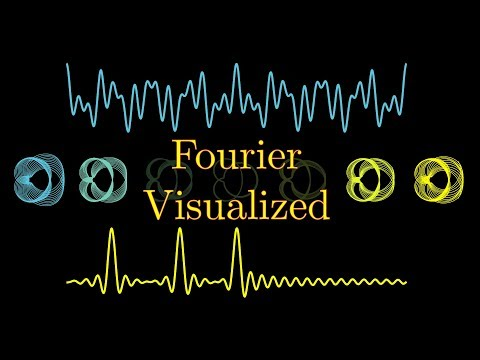

In [ ]:
#@title Video 1: A visual intro to the Fourier Transform 
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='spUNpyF58BY', width=854, height=480, fs=1, end=149)
print("Video available at https://youtube.com/watch?v=" + video.id)


---
## Imports and helper functions
First, we'll need to import some Python packages that will allow us to simulate and plot data for this session. Please execute the cell(s) below to initialize the notebook environment.


In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [ ]:
#@title Figure Settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use("https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/master/mplsettings")

In [ ]:
#@title Helper functions

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

----
## Simulate a periodic signal


In [ ]:
# Variables
sRate = 10000 # sample rate in Hertz
freq1 = 8.0 # frequency of first sine wave
freq2 = 30.0 # frequency of second sine wave
freq3 = 100.0 # frequency of second sine wave

amplitude1 = 12 # amplitude of first wave
amplitude2 = 10 # amplitude of second wave
amplitude3 = 5 # amplitude of second wave

numPeriods = 2 # number of periods of the sine waves
numSamples = sRate * numPeriods # total number of samples

# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)
x

array([0.00000000e+00, 1.00005000e-04, 2.00010001e-04, ...,
       1.99979999e+00, 1.99989999e+00, 2.00000000e+00])

In [ ]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)
f3 = lambda x: amplitude3*np.sin(freq3*2*np.pi*x)

sampled_f1 = [f1(i) for i in x]
sampled_f2 = [f2(i) for i in x]
sampled_f3 = [f3(i) for i in x]

sampled_fcomb = [(f1(i)+f2(i)+f3(i)) for i in x]


In [ ]:
sampled_fcomb=np.array(sampled_fcomb)

In [ ]:

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator
seed(1)
# create white noise series
noise = [gauss(0.0, 1.0)*5 for i in sampled_fcomb]
new_signal = sampled_fcomb + noise


(0.0, 0.5)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


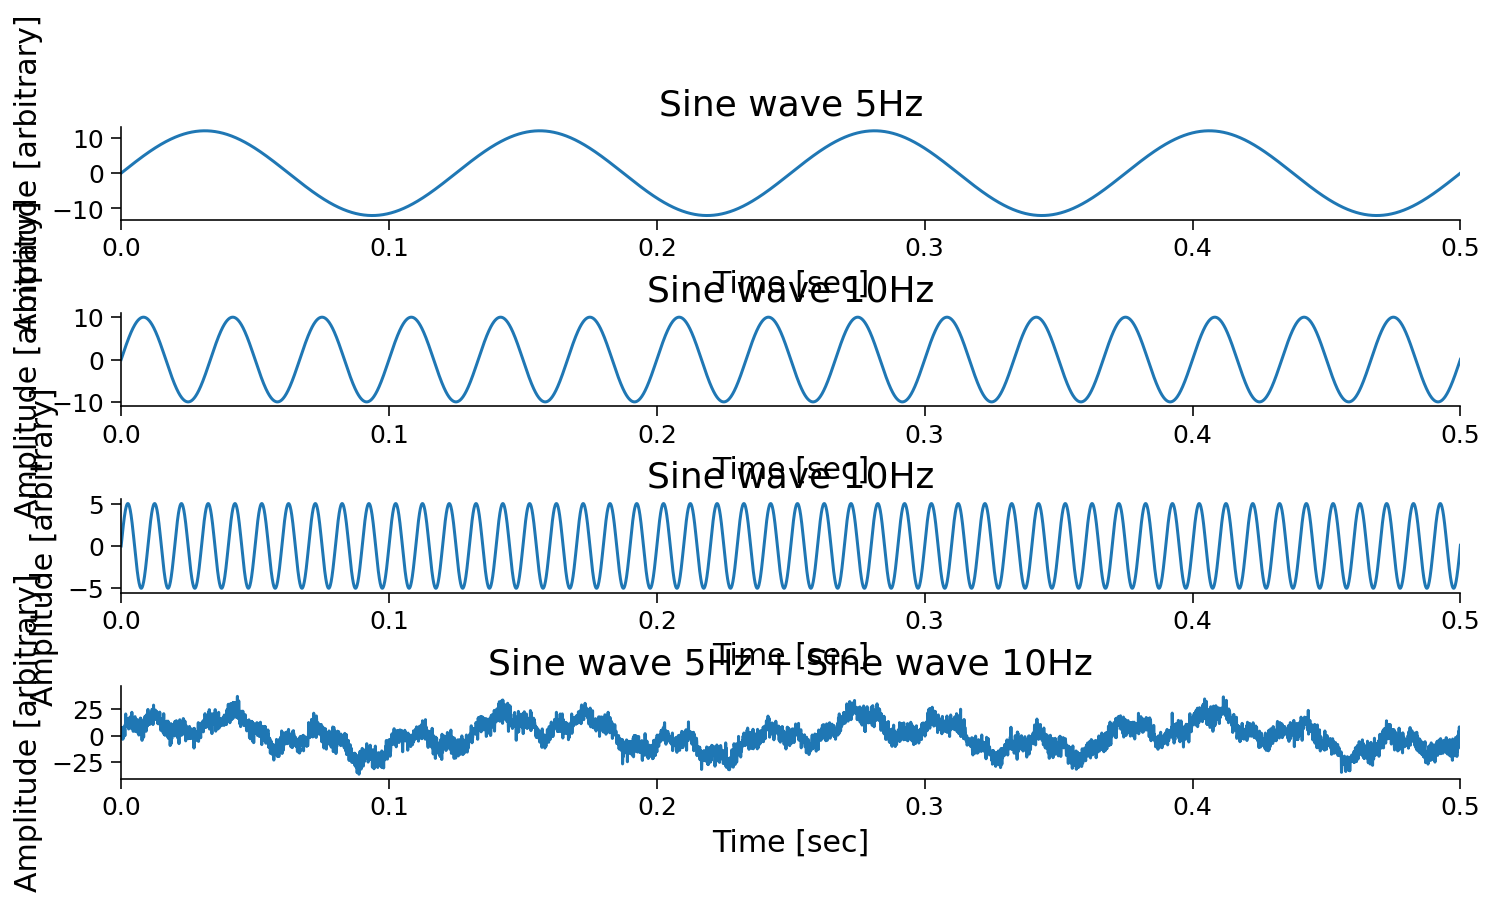

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(411)
plt.plot(x, sampled_f1)
plt.title('Sine wave 5Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
#plt.ylim(-15, 15)

plt.subplot(412)
plt.plot(x, sampled_f2)
plt.title('Sine wave 10Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
#plt.ylim(-10, 10)

plt.subplot(413)
plt.plot(x, sampled_f3)
plt.title('Sine wave 10Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
#plt.ylim(-10, 10)

plt.subplot(414)
plt.plot(x, new_signal)
plt.title('Sine wave 5Hz + Sine wave 10Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
#plt.ylim(-25, 25)

Calculate the 

In [ ]:
fft_output = np.fft.rfft(sampled_fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

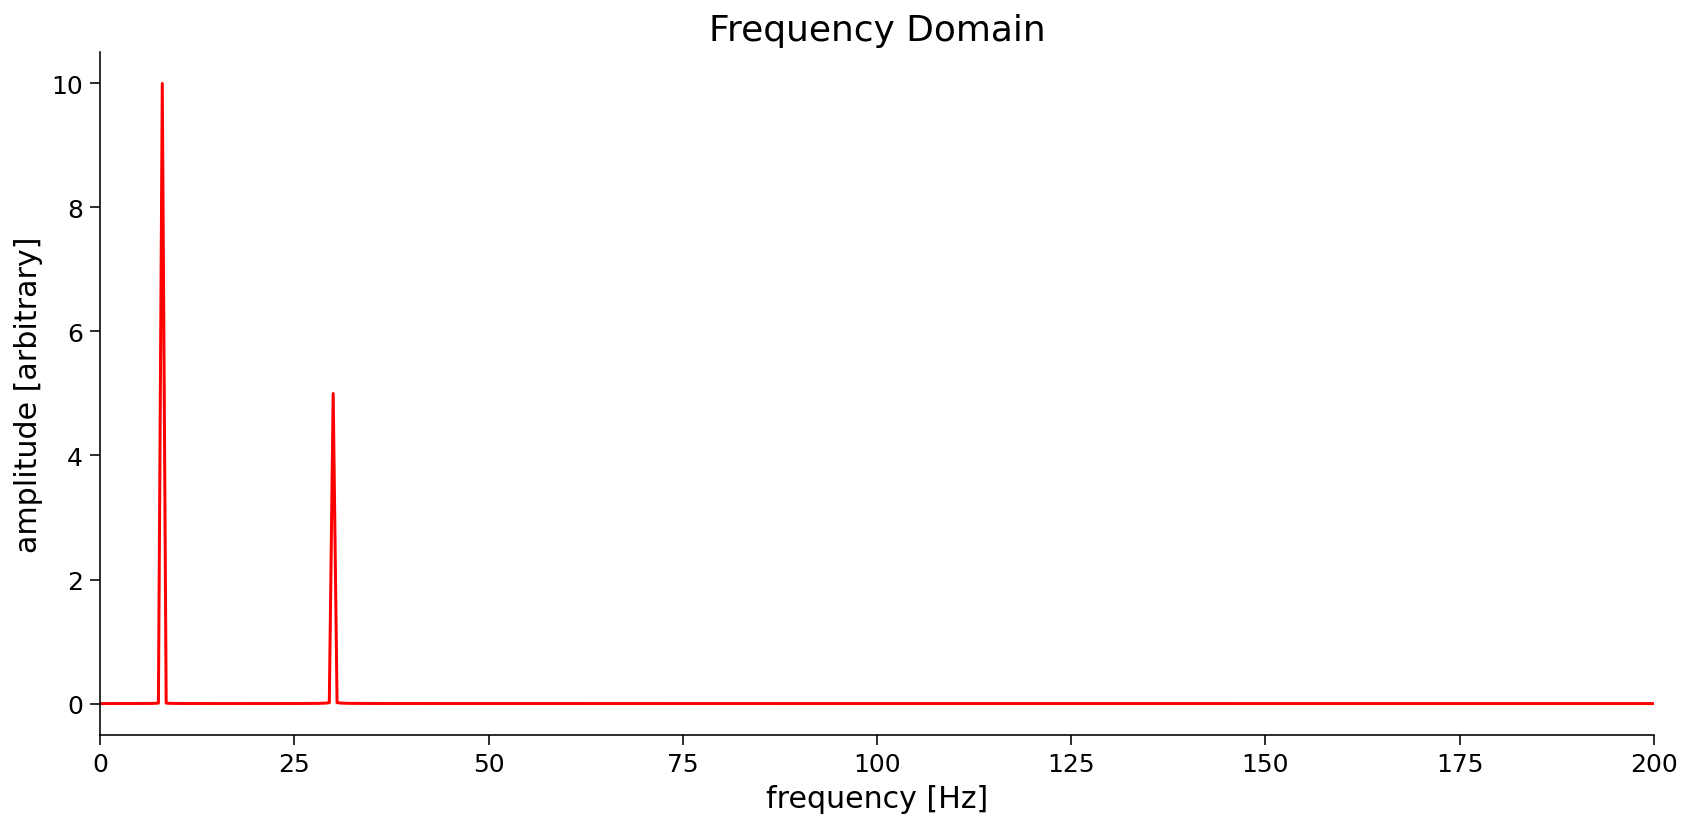

In [ ]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(0, 200)
plt.plot(frequencies, magnitude, 'r')

##Further Resources!

Another great interactive visualization of the Fourier Transform [here!](https://prajwalsouza.github.io/Experiments/Fourier-Transform-Visualization.*html*)

A short, [Guardian article](https://www.theguardian.com/science/2014/jul/13/fourier-transform-maths-equations-history) on the many uses of the Fourier Transform.
